# US Flights of 2020 Jan

## by Mani Sai Prasad

## Investigation Overview

> The report will gather & analyze flights of 2020 Jan which is (607346) observations by resolve the following questions:-
* what is the rate of delayed and cancelled flighes?
* what are the best airlines in terms of delayed and cancelled flighes?
* what are the best flights in terms of delayed and cancelled flighes?

## Dataset Overview

 * The Dataset contains flights data in the United States, including carriers, arrival and departure delays in 2020 Jan. https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID= 

* The data set has 45 features

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('./62598021_T_ONTIME_REPORTING.csv')
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 44
0,2020,1,1,3,WN,N951WN,5888,13891,1389101,32575,...,122.0,74.0,1.0,363.0,8.0,0.0,27.0,0.0,33.0,NaN
1,2020,1,1,3,WN,N467WN,6276,13891,1389101,32575,...,92.0,71.0,1.0,363.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,3,WN,N7885A,4598,13891,1389101,32575,...,68.0,57.0,1.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,3,WN,N551WN,4761,13891,1389101,32575,...,75.0,63.0,1.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,3,WN,N968WN,5162,13891,1389101,32575,...,67.0,57.0,1.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# correcting dates formate
df['DEP_TIME'] = df.DEP_TIME.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
df['CRS_DEP_TIME'] = df.CRS_DEP_TIME.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
df['ARR_TIME'] = df.ARR_TIME.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
df['CRS_ARR_TIME'] = df.CRS_ARR_TIME.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)

# creating AM/PM in df
def setPM(x):
    if((x>=12) & (x<= 23)):
        return 'PM'
    elif((x>=0) & (x<= 11) | (x==24)):
        return 'AM'
    else:
        return x
df.DEP_TIME.dropna(inplace=True)
df['DepTimePM'] = df.DEP_TIME.str[:2].astype('int64')
df['DepTimePM'] = df.DepTimePM.apply(setPM)
df.DepTimePM.dropna(inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Delayed & Cancelled Flights (Visualization 1)

> Delayed Flight departures and Arrivals distributed in the whole US.
1.14% Flights are Cancelled

### Rate of cancelled flights

>There are 1.14% flights were cancelled.

([<matplotlib.patches.Wedge at 0x1a231c5710>,
 [Text(-1.0992937471914488, 0.03941138649912187, ''),
  Text(1.099293745807713, -0.0394114250953628, '')],
 [Text(-0.5996147711953357, 0.021497119908611924, '98.86%'),
  Text(0.5996147704405707, -0.02149714096110698, '1.14%')])

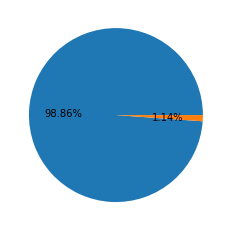

In [38]:
plt.pie(df.CANCELLED.value_counts(), autopct='%.2f%%')


### Distribution of departure delay



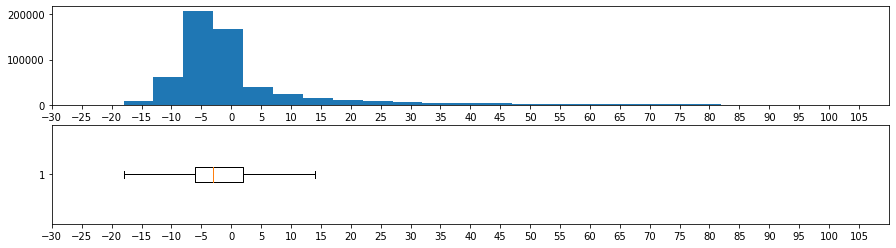

In [15]:

plt.figure(figsize=[15,4])

plt.subplot(2,1,1)
step = 5
x_min, x_max = -30, 110
bin_edges = np.arange(df.DEP_DELAY.min()-step, df.DEP_DELAY.max()+step, step)
plt.hist(df.DEP_DELAY, bins=bin_edges)
plt.xlim(x_min,x_max)
plt.xticks(np.arange(x_min, x_max, step))


plt.subplot(2,1,2)
plt.boxplot(x=df[pd.notnull(df.DEP_DELAY)].DEP_DELAY, vert=False, showfliers=False)
plt.xlim(x_min,x_max)
plt.xticks(np.arange(x_min, x_max, step));

> There are delayed departures as well as earlier departures and the most of them are between -25 to 25 min differ of the scheduled time. However, there is a flight has been delayed more than 1 day and 17 hours, and also there is a flight had be earlier around 9 hours of the schedule time.

### Distribution of arrival delay

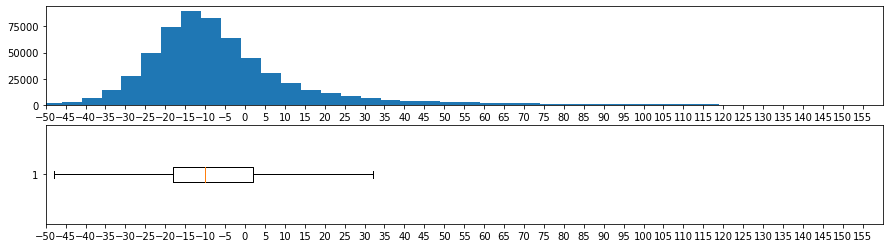

In [17]:
plt.figure(figsize=[15,4])
plt.subplot(2,1,1)
step = 5
x_min, x_max = -50, 160
bin_edges = np.arange(df.ARR_DELAY.min()-step, df.ARR_DELAY.max()+step, step)
plt.hist(df.ARR_DELAY, bins=bin_edges)
plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, step))

plt.subplot(2,1,2)
plt.boxplot(x=df[pd.notnull(df.ARR_DELAY)].ARR_DELAY, vert=False, showfliers=False)
plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, step));

> There are delayed arrivals as well as earlier arrivals and the most of them are between -45 to 45 min differ of the scheduled time.



## Airlines to Avoice Delay & Cancellation (Visualization 2)

#### Airlines with min delay & Cancellation of flightes:

Endeavor Air(9E), Republic Airways(YX) and Frontier Airline(F9)

#### Airlines with max delay & Cancellation of flightes:

Envoy Air(MQ), Infinity Air and Mesa Airlines(YV)


In [18]:
airlines_mean = df.groupby('OP_UNIQUE_CARRIER', as_index=False).mean()
airlines_count = df.groupby('OP_UNIQUE_CARRIER', as_index=False).count()

airlines = airlines_mean[['OP_UNIQUE_CARRIER','ARR_DELAY','CANCELLED']].merge(
    airlines_count[['OP_UNIQUE_CARRIER','FLIGHTS']], on='OP_UNIQUE_CARRIER'
)
airlines.rename(columns={'FLIGHTS':'Count'}, inplace=True)

airlines['Size'] = airlines.Count.map(lambda x: round(x/120000)+1)
airlines['Size'] = airlines.Size.map(lambda x: 7 if x>7 else x)

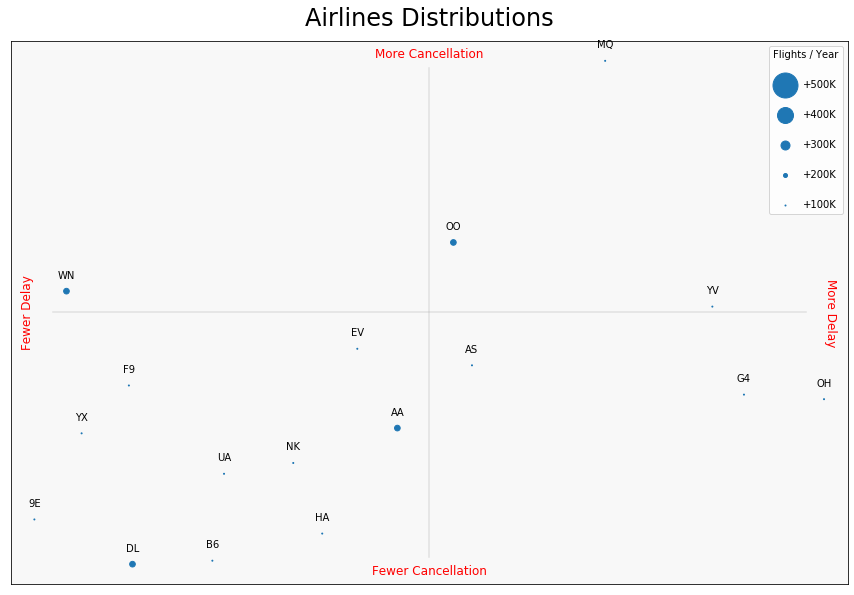

In [20]:
plt.figure(figsize=[15,10])

for size in np.arange(5,0,-1):
    plt.scatter([], [], c='C0', s=size**4, label='+'+ str(size*100) + 'K')
plt.legend(scatterpoints=1,  
           labelspacing=2, 
           frameon=True, 
           title='Flights / Year', 
           mode=2
          )

ax = plt.subplot()
ax.scatter(airlines.ARR_DELAY, airlines.CANCELLED, s=airlines.Size**5, c='C0')

x_max = max(airlines.ARR_DELAY)
x_min = min(airlines.ARR_DELAY)

y_max = max(airlines.CANCELLED)
y_min = min(airlines.CANCELLED)

x_len =  x_max - x_min
y_len =  y_max - y_min

x = x_len*.03
y = y_len*.04

ax.set_xlim(x_min-x, x_max+x)
ax.set_ylim(y_min-y, y_max+y)

ax.axhline(y=y_max-(y_len/2), xmin=.05, xmax=.95, color='darkgray', alpha=.3) 
ax.axvline(x=x_max-(x_len/2), ymin=.05, ymax=.95, color='darkgray', alpha=.3)

ax.text(x_min,y_max-(y_len/2),'Fewer Delay', rotation=90, fontsize=12, color='r', ha='right', va='center')
ax.text(x_max,y_max-(y_len/2),'More Delay', rotation=-90, fontsize=12, color='r', ha='left', va='center')

ax.text(x_max-(x_len/2),y_min,'Fewer Cancellation', rotation=0, fontsize=12, color='r', ha='center', va='top')
ax.text(x_max-(x_len/2),y_max,'More Cancellation', rotation=0, fontsize=12, color='r', ha='center', va='bottom')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax.set_facecolor('#f8f8f8')
ax.set_title('Airlines Distributions', fontsize=24, pad=15)

    
for i, name in enumerate(airlines.OP_UNIQUE_CARRIER):
    if(airlines.Size[i]>3):
        ax.text(airlines.ARR_DELAY[i], airlines.CANCELLED[i], name, ha='center', va='center', color='w')
    else:
        ax.text(airlines.ARR_DELAY[i], airlines.CANCELLED[i]+.001, name, ha='center', va='center', color='k')

## Flights Time to Avoice Delay & Cancellation (Visualization 3)
> Morning flights are cancelled more than Evening flights, while Evening flights are more delayed than Morning flights.


In [21]:
flights_mean = df.groupby(['OP_CARRIER_FL_NUM','DepTimePM'], as_index=False).mean()
flights_count = df.groupby('OP_CARRIER_FL_NUM', as_index=False).count()

flights = flights_mean[['OP_CARRIER_FL_NUM','DepTimePM', 'DEP_DELAY','CANCELLED']].merge(
    flights_count[['OP_CARRIER_FL_NUM','FLIGHTS']], on='OP_CARRIER_FL_NUM'
)
flights.rename(columns={'FLIGHTS':'Count'}, inplace=True)

Q1 = flights.quantile(.25)
Q3 = flights.quantile(.75)
IQ = Q3-Q1
Q_max = Q3+IQ*1.5
Q_min = Q1-IQ*1.5

flights_filtered = flights[(flights.DEP_DELAY > Q_min.DEP_DELAY) & (flights.DEP_DELAY < Q_max.DEP_DELAY)]

flights_filtered = flights_filtered[
    (flights_filtered.Count > Q_min.Count) & (flights_filtered.Count < Q_max.Count)
]

flights_no_cxl = flights_filtered[flights_filtered.CANCELLED == 0]
flights_filtered = flights_filtered[flights_filtered.CANCELLED > 0]

flights_filtered.reset_index(inplace=True)

flights_filtered = flights[flights.CANCELLED > 0]

Text(0.5, 1.0, 'Airlines Distributions')

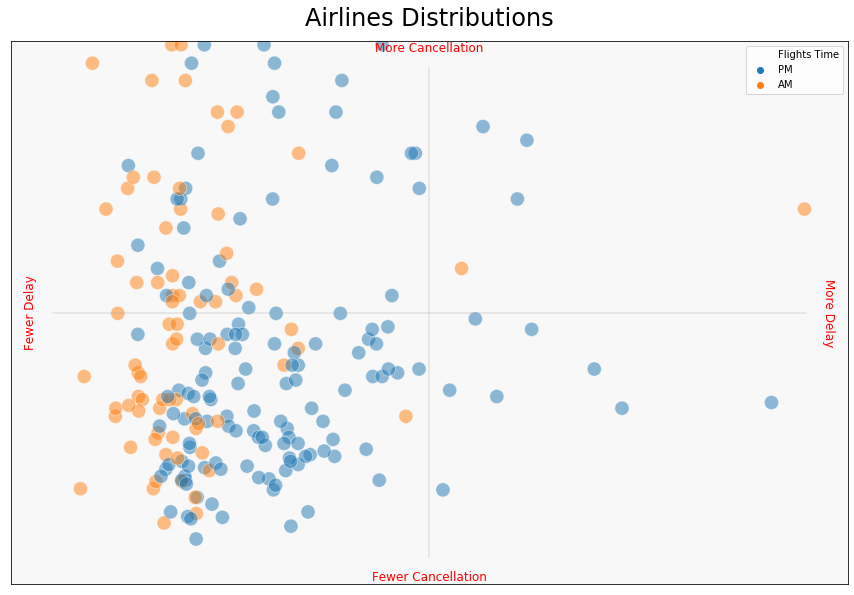

In [28]:
plt.figure(figsize=[15,10])

ax = plt.subplot()

ax = sb.scatterplot(flights_filtered.DEP_DELAY, 
           flights_filtered.CANCELLED, 
           hue=flights_filtered.DepTimePM, s=200, alpha=.5)

legend = ax.legend()
legend.texts[0].set_text("Flights Time")

# x_max = max(flights_filtered.DepDelay)
x_max = 50
x_min = min(flights_filtered.DEP_DELAY)

# y_max = max(flights_filtered.Cancelled)
y_max = .03
y_min = min(flights_filtered.CANCELLED)

x_len =  x_max - x_min
y_len =  y_max - y_min

x = x_len*.1
y = y_len*.1

ax.set_xlim(x_min-x, x_max+x)
ax.set_ylim(y_min-y, y_max+y)

ax.axhline(y=y_max-(y_len/2), xmin=.05, xmax=.95, color='darkgray', alpha=.3) 
ax.axvline(x=x_max-(x_len/2), ymin=.05, ymax=.95, color='darkgray', alpha=.3)

ax.text(x_min-3.5,y_max-(y_len/2),'Fewer Delay', rotation=90, fontsize=12, color='r', ha='right', va='center')
ax.text(x_max+3.5,y_max-(y_len/2),'More Delay', rotation=-90, fontsize=12, color='r', ha='left', va='center')

ax.text(x_max-(x_len/2),y_min-.0017,'Fewer Cancellation', rotation=0, fontsize=12, color='r', ha='center', va='top')
ax.text(x_max-(x_len/2),y_max+.0017,'More Cancellation', rotation=0, fontsize=12, color='r', ha='center', va='bottom')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax.set_facecolor('#f8f8f8')
ax.set_title('Airlines Distributions', fontsize=24, pad=15)

    

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [40]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 492774 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck.slides.html
Use Control-C to stop this server
^C

Interrupted
